In [1]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)

In [2]:
df.columns=['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO', 'B','LSTAT','MEDV']

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest
from pyod.models.knn import KNN 
import pyod
from pyod.utils.data import evaluate_print

In [4]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
import numpy as np

In [5]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers
import seaborn as sns 

In [21]:
df['LSTAT']

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 506, dtype: float64

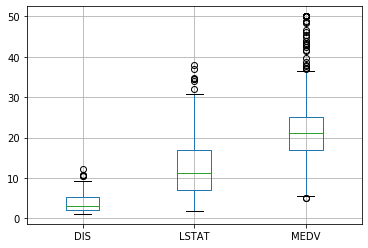

In [31]:
df.boxplot()
#RM,DIS,LSTAT,MEDV

In [6]:
 df = df.loc[:, df.columns.intersection(['DIS','LSTAT','MEDV'])]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


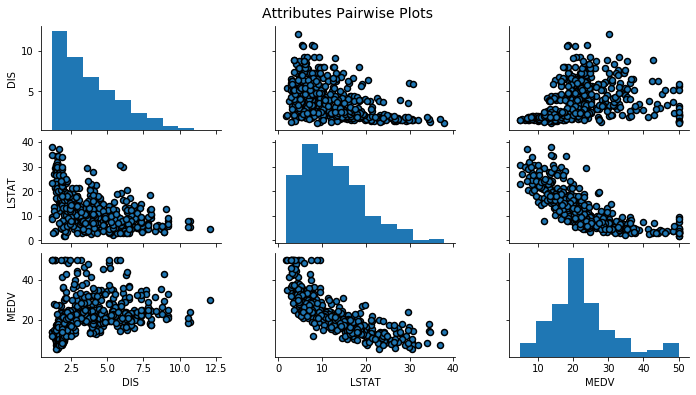

In [7]:
pp = sns.pairplot(df, size=1.8, aspect=1.8,plot_kws=dict(edgecolor="k", linewidth=1.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)

In [8]:
data=df.values

In [9]:
from sklearn.neighbors import NearestNeighbors

In [10]:
# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)
# fit model
nbrs.fit(data)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

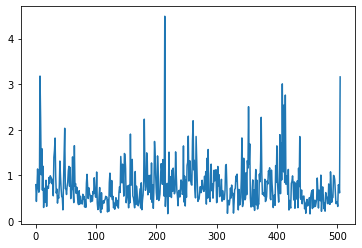

In [11]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(data)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [12]:
outlier_index = np.where(distances.mean(axis = 1) >1.5)
outlier_values = df.iloc[outlier_index]
outlier_values

,DIS,LSTAT,MEDV
7,5.9505,19.15,27.1
8,6.0821,29.93,16.5
10,6.3467,20.45,15.0
31,4.1750,13.04,14.5
32,3.9900,27.71,13.2
48,5.8700,30.81,14.4
64,9.2229,8.05,33.0
157,1.8773,4.59,41.3
180,2.7410,7.56,39.8
197,7.3090,8.61,30.3


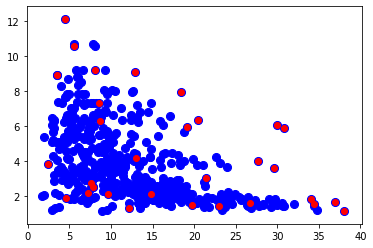

In [13]:
# plot data
plt.scatter(df["LSTAT"], df["DIS"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["LSTAT"], outlier_values["DIS"], color = "r")
plt.legend( ["True Value", "Outliers"])
plt.title("Outlier Detection Using Isolation Forest")

In [55]:
outlier_index

(array([  7,   8,  10,  31,  32,  48,  64, 157, 180, 197, 214, 221, 232,
        245, 253, 260, 261, 266, 286, 342, 353, 355, 374, 400, 405, 407,
        409, 412, 414, 438, 505], dtype=int64),)

In [14]:
df_knn_filtered=df.drop(df.index[outlier_index])

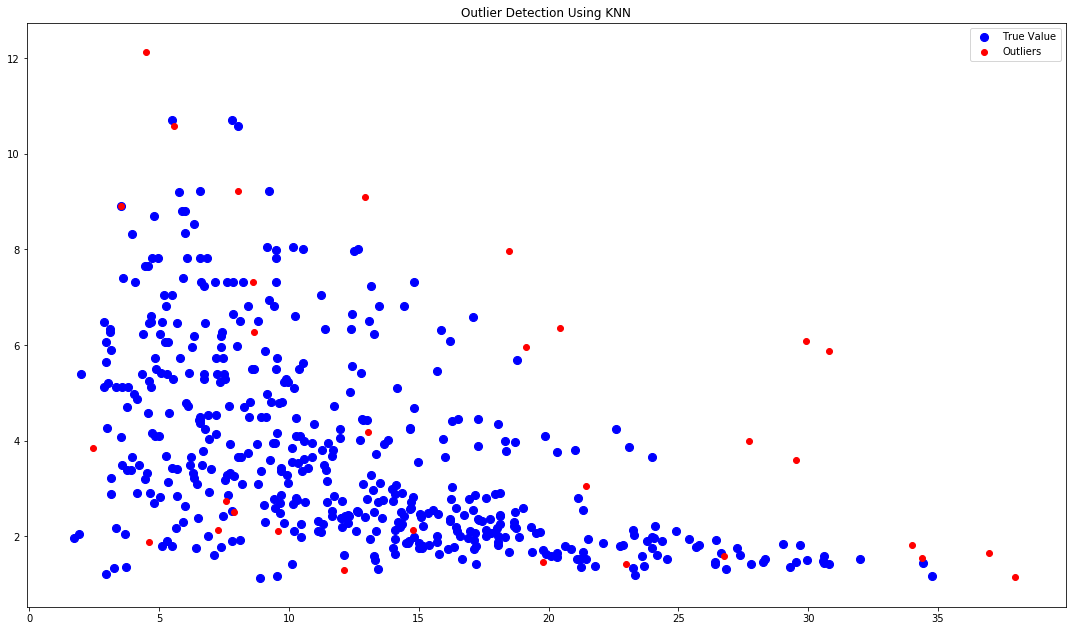

In [60]:
# plot data
plt.scatter(df_knn_filtered["LSTAT"], df_knn_filtered["DIS"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["LSTAT"], outlier_values["DIS"], color = "r")
plt.legend( ["True Value", "Outliers"])
plt.title("Outlier Detection Using KNN")


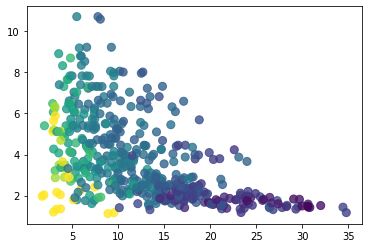

In [19]:
plt.scatter(df_knn_filtered["LSTAT"], df_knn_filtered["DIS"], c=df_knn_filtered['MEDV'], alpha=0.8, s = 65)

In [20]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.1402136  1.0755623  0.15968566]
 [0.55715988 0.49243937 0.10152429]
 [0.55715988 1.2087274  1.32424667]
 ...
 [0.77368357 0.98304761 0.14880191]
 [0.66843684 0.86530163 0.0579893 ]
 [0.61324648 0.66905833 1.15724782]]


In [33]:
threshold = 2

In [34]:
print(np.where(z > 2))

(array([  8,  32,  48,  55,  56,  57,  64,  98, 126, 141, 144, 145, 147,
       148, 157, 161, 162, 163, 166, 186, 195, 202, 203, 204, 214, 224,
       225, 228, 232, 233, 246, 247, 252, 253, 253, 254, 255, 256, 257,
       261, 262, 267, 268, 280, 282, 283, 286, 345, 346, 347, 348, 349,
       350, 351, 352, 353, 354, 355, 368, 369, 370, 371, 372, 373, 374,
       384, 385, 386, 387, 388, 398, 399, 404, 412, 414, 415, 438, 490],
      dtype=int64), array([1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


In [35]:
outlier_values_Z = df.iloc[(z > 2)]

In [36]:
df_filterd_Z =df[(z < 2).all(axis=1)]

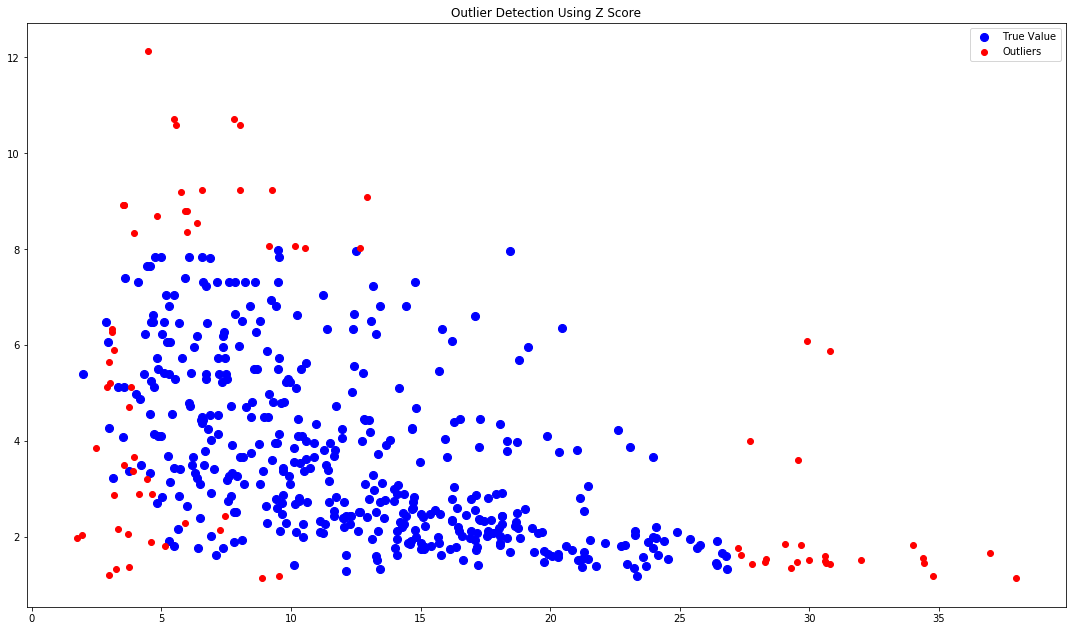

In [59]:
# plot data
plt.scatter(df_filterd_Z["LSTAT"], df_filterd_Z["DIS"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values_Z["LSTAT"], outlier_values_Z["DIS"], color = "r")
plt.legend( ["True Value", "Outliers"])
plt.title("Outlier Detection Using Z Score")


In [38]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(data)

In [39]:
mask = yhat != -1
df_filterd_if= data[mask, :]

In [40]:
df_filterd_if=pd.DataFrame(df_filterd_if)

In [44]:
mask = yhat == -1
outlier_values_if= data[mask, :]


In [45]:
outlier_values_if=pd.DataFrame(outlier_values_if)

In [46]:
df_filterd_if.columns=['DIS','LSTAT','MEDV']
outlier_values_if.columns=['DIS','LSTAT','MEDV']

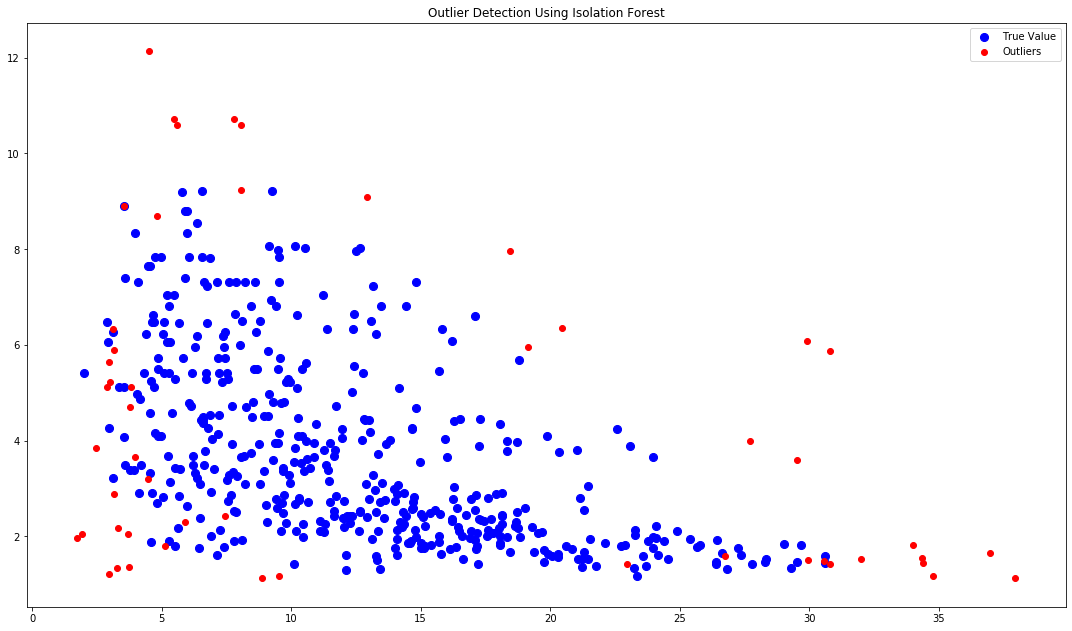

In [58]:
# plot data
plt.scatter(df_filterd_if["LSTAT"], df_filterd_if["DIS"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values_if["LSTAT"], outlier_values_if["DIS"], color = "r")
plt.legend( ["True Value", "Outliers"])
plt.title("Outlier Detection Using Isolation Forest")


In [53]:
plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig("Outlier Detection Using KNN")

In [33]:
outlier_fraction = 0.1
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),
     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction)
}
xx , yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

In [34]:
data=df.values
X,y = data[:, :-1], data[:, -1]
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [35]:
#set the figure size
plt.figure(figsize=(10, 10))
for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)
    
    # no of errors in prediction
    n_errors = (y_pred != Y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
#     threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

#     # decision function calculates the raw anomaly score for every point
#     Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
#     Z = Z.reshape(xx.shape)

#     subplot = plt.subplot(1, 2, i + 1)

#     # fill blue colormap from minimum anomaly score to threshold value
#     subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

#     # draw red contour line where anomaly score is equal to threshold
#     a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

#     # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
#     subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

#     # scatter plot of inliers with white dots
#     b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
#     # scatter plot of outliers with black dots
#     c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
#     subplot.axis('tight')

#     subplot.legend(
#         [a.collections[0], b, c],
#         ['learned decision function', 'true inliers', 'true outliers'],
#         prop=matplotlib.font_manager.FontProperties(size=10),
#         loc='lower right')

#     subplot.set_title(clf_name)
#     subplot.set_xlim((-10, 10))
#     subplot.set_ylim((-10, 10))
# plt.show() 

No of Errors :  Angle-based Outlier Detector (ABOD) 339
No of Errors :  K Nearest Neighbors (KNN) 339


<Figure size 720x720 with 0 Axes>

In [36]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [38]:
mask = y_pred != 1
X_train = X_train[mask, :]

In [31]:
X_train=X_train.reshape(-1,1)

In [40]:
df_filtered=pd.DataFrame(X_train)

In [47]:
df_filtered.columns=['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO', 'B','LSTAT']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


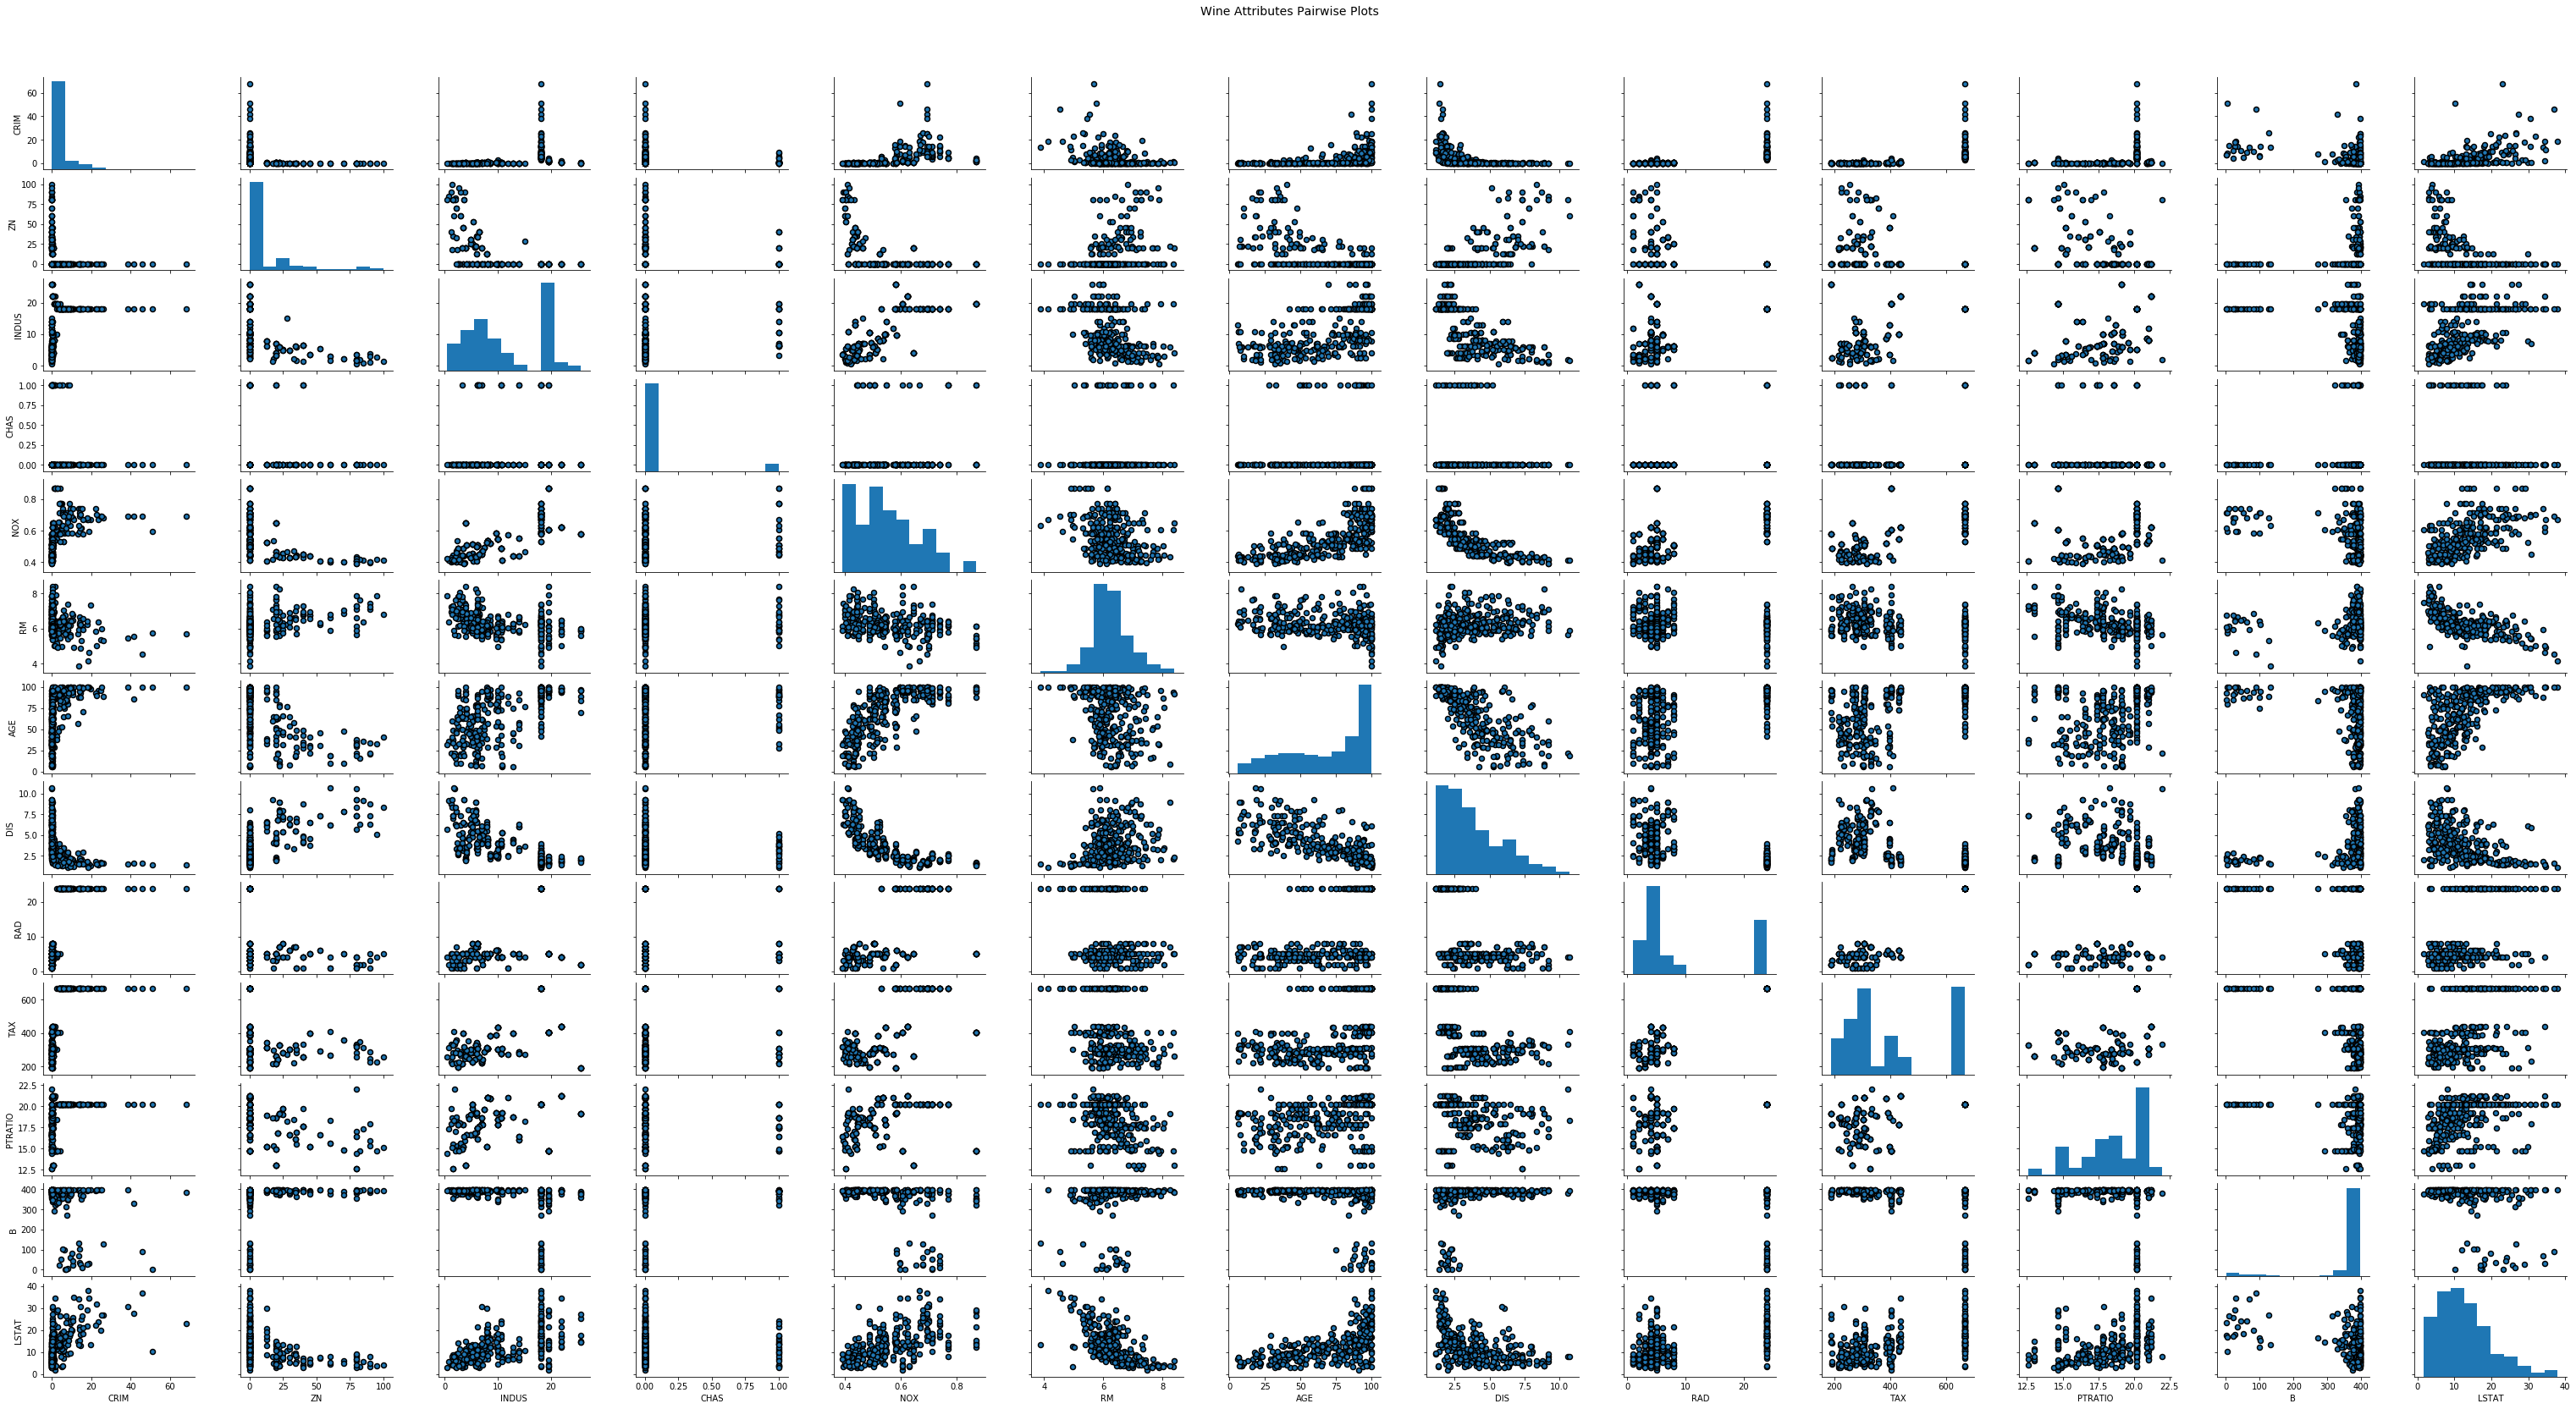

In [54]:
pp = sns.pairplot(df_filtered, size=1.8, aspect=1.8,plot_kws=dict(edgecolor="k", linewidth=1.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

NameError: name 't' is not defined